## Задание
В рамках этого задания мы будем создавать программу, которая получая на вход отзыв, будет предсказывать, является отзыв положительным или отрицательным. Делать мы будем это таким образом: мы возьмём некоторое число заранее размеченных как положительные или отрицательные отзывов, выделим те слова, которые встречаются только в положительных или только в отрицательных отзывах, и будем считать, каких слов  в поступившем нам на проверку отзыве больше.


Мы будем работать по заранее определённому пайплайну:

1.  Сначала нам надо скачать дату -- соберите как минимум 60 (30 положительных  и 30 отрицательных) отзывов на похожие продукты (не надо мешать отзывы на отели с отзывами на ноутбуки) для составления "тонального словаря" (чем больше отзывов, тем лучше)  и 10 отзывов для проверки качества.   (2 балла в случае сбора путём парсинга, 1 - если найдете уже готовые данные или просто закопипастите без парсинга)

# Решение

Данные собраны с сайта [metacritic.com](https://www.metacritic.com/person/weezer), это отзывы на альбомы Weezer

штош пишем краулер

In [3]:
import requests
from fake_useragent import UserAgent
from bs4 import BeautifulSoup

import time
import random

session = requests.session()
known_proxy_ip = '109.173.86.43:8000'
proxy = {'http': known_proxy_ip, 'https': known_proxy_ip}

with open('errors.txt', 'w') as f:
    pass

# download soup

def get_page(url): 
    
    user_agent = UserAgent().chrome
    try:
        response = session.get(url, headers={'User-Agent':user_agent})
    except Exception as err:
        with open('errors.txt', 'a') as f:
            f.write(f'{err}\t{url}\n')
    soup = BeautifulSoup(response.text, 'html.parser')
    time.sleep(random.random())
    
    return soup

In [2]:
# save reviews from a page to a dict

def get_reviews(url): 
    page = get_page(url)
    reviews = page.findAll('div', {'class': 'review_content'})
    review_dics = []
    
    for review_soup in reviews:
        review_dic = {}
        review_dic['text'] = review_soup.findAll('div', {'class': 'review_body'})[0].text.strip()
        review_dic['grade'] = review_soup.findAll('div', {'class': 'review_grade'})[0].text.strip()
        review_dic['album'] = url.split('/')[-3]
        review_dics.append(review_dic)
        
    return review_dics

In [3]:
# collect all the links to Weezer album reviews

page = get_page('https://www.metacritic.com/person/weezer')
links = []

for album in page.findAll('td', {'class': 'title brief_metascore'}):
    link = album.findAll('a')[0]['href']
    links.append(f'https://www.metacritic.com{link}/user-reviews')
    
links

['https://www.metacritic.com/music/sznz-spring-ep/weezer/user-reviews',
 'https://www.metacritic.com/music/van-weezer/weezer/user-reviews',
 'https://www.metacritic.com/music/ok-human/weezer/user-reviews',
 'https://www.metacritic.com/music/weezer-black-album/weezer/user-reviews',
 'https://www.metacritic.com/music/weezer-teal-album/weezer/user-reviews',
 'https://www.metacritic.com/music/pacific-daydream/weezer/user-reviews',
 'https://www.metacritic.com/music/weezer-white-album/weezer/user-reviews',
 'https://www.metacritic.com/music/everything-will-be-alright-in-the-end/weezer/user-reviews',
 'https://www.metacritic.com/music/death-to-false-metal/weezer/user-reviews',
 'https://www.metacritic.com/music/pinkerton-deluxe-edition/weezer/user-reviews',
 'https://www.metacritic.com/music/hurley/weezer/user-reviews',
 'https://www.metacritic.com/music/raditude/weezer/user-reviews',
 'https://www.metacritic.com/music/weezer-red-album/weezer/user-reviews',
 'https://www.metacritic.com/music

In [4]:
reviews = []

# gather reviews
for link in links:
    reviews.extend(get_reviews(link))
    
len(reviews)

851

In [5]:
import pandas as pd

rev_df = pd.DataFrame(reviews)
rev_df['grade'] = rev_df['grade'].astype(float)

# critic (non-user) reviews have 0-100 scores, so we divide them by 10
rev_df['grade'] = rev_df['grade'].apply(lambda x: x / 10 if x > 10 else x)
# divide the grades into positive and negative
rev_df['target'] = rev_df['grade'].apply(lambda x: 0 if x < 5 else 1)
rev_df

,text,grade,album,target
0,A continuation with the experimentation that O...,9.0,sznz-spring-ep,1
1,Undeniably light on substance but still plenty...,8.0,sznz-spring-ep,1
2,"If we’re being honest here, this album isn’t f...",6.0,sznz-spring-ep,1
3,Really love all the tracks here. Angels On Vac...,10.0,sznz-spring-ep,1
4,While it does not reach the heights and emotio...,10.0,sznz-spring-ep,1
...,...,...,...,...
846,Would I recommend the green album in compariso...,6.0,weezer-2001,1
847,Ohhh yes good very i think. hmmm no yes it is ...,10.0,weezer-2001,1
848,The 11 tracks trundle along in a generally ino...,5.0,weezer-2001,1
849,Feels a bit repetitive and perfunctory the fir...,7.0,weezer-2001,1


In [4]:
import pandas as pd
rev_df = pd.read_json('weezer_reviews.json')

/Users/shikunova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='grade', ylabel='Density'>

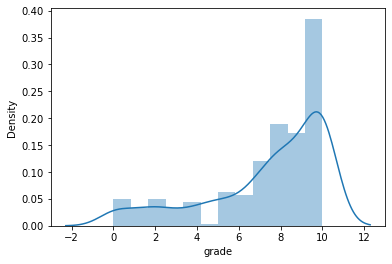

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribution of the grades (skewed towards the positive; people seem to like weezer too much for their own good)
sns.distplot(rev_df['grade'])

In [6]:
# not balanced
rev_df['target'].value_counts()

1    700
0    151
Name: target, dtype: int64

<AxesSubplot:title={'center':'Positive reviews by album'}, xlabel='album'>

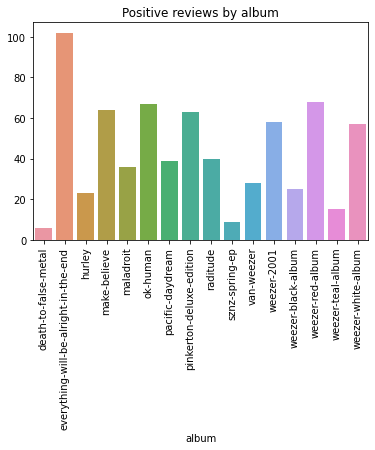

In [7]:
show_df = rev_df.groupby('album')['target'].sum()
plt.title('Positive reviews by album')
plt.xticks(rotation=90)
sns.barplot(x=show_df.index, y=show_df.values)

In [9]:
# save the data
rev_df.to_json('weezer_reviews.json')

2. Токенизируйте слова,  приведите их к нижнему регистру и к начальной форме  (1 балл за токенизацию, 1 - за начальную форму)

3. Составьте 2 множества - в одном будут слова, которые встречаются только в положительных отзывах, а в другом - встречающиеся только в отрицательных. Попробуйте поиграть с частотностями и исключить шум (к примеру, выбросить слова, встречающиеся 1-2 раза) (2 балла) (если у вас получились пустые множества, уберите фильтр по частотности или увеличьте выборку)

4. Создайте функцию, которая будет определять, положительный ли отзыв или отрицательный в зависимости от того, какие слова встретились в нём, и посчитайте качество при помощи accuracy (1  - за коректно работающую функцию, 1 - за подсчёт accuracy)

5. Предложите как минимум 2 способа улучшить эту программу с помощью добавления к ней любых мулек (1 балл за описание словами, 2 - если реализуете хотя бы один способ)

В случае, если после долгих мучений в п. 3 множества по объективным причинам не получается (покажите, что пытались) - отправляйте жабу - зачтём полный балл

In [8]:
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
import string
  
lemmatizer = WordNetLemmatizer()

def preprocess_text(s, return_list=True):
    # lower and tokenize
    tokens = wordpunct_tokenize(s.lower())
    # lemmatize
    lemmas = []
    for token in tokens:
        # skip numbers and punctuation
        if not (all([char in string.punctuation+'!….' for char in token]) or all([char.isdigit() for char in token])):
            lemmas.append(lemmatizer.lemmatize(token))
        
    if return_list:   
        return lemmas
    else:
        return ' '.join(lemmas)

In [9]:
preprocess_text('I lovE trAINS!!! 228322 aaaaaa')

['i', 'love', 'train', 'aaaaaa']

In [10]:
from tqdm import tqdm
tqdm.pandas()

# preprocess the entire text column
rev_df['prep_text'] = rev_df['text'].progress_apply(preprocess_text)

100%|██████████| 851/851 [00:00<00:00, 1842.61it/s]


3. Составьте 2 множества - в одном будут слова, которые встречаются только в положительных отзывах, а в другом - встречающиеся только в отрицательных. Попробуйте поиграть с частотностями и исключить шум (к примеру, выбросить слова, встречающиеся 1-2 раза) (2 балла) (если у вас получились пустые множества, уберите фильтр по частотности или увеличьте выборку)

In [11]:
from sklearn.model_selection import train_test_split

# 80% train, 10% validation, 10% test
X_train, X_val_test, y_train, y_val_test = train_test_split(
    rev_df[['text', 'prep_text']], rev_df[['target']], test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=42)

print(len(X_train), 'training reviews')
print(len(X_val), 'validation reviews')
print(len(X_test), 'testing reviews')

680 training reviews
85 validation reviews
86 testing reviews


In [12]:
from collections import Counter

# make word lists for good and bad reviews
all_words_good = sum(X_train.loc[y_train['target'] == 1]['prep_text'].tolist(), [])
all_words_bad = sum(X_train.loc[y_train['target'] == 0]['prep_text'].tolist(), [])

# make frequency dicts
freq_dict_good = Counter(all_words_good)
freq_dict_bad = Counter(all_words_bad)

In [13]:
# take top 200 words by frequency
most_freq_good = dict(freq_dict_good.most_common(200)).keys()
most_freq_bad = dict(freq_dict_bad.most_common(200)).keys()

In [14]:
words_good_only = set(most_freq_good).difference(set(most_freq_bad))
words_bad_only = set(most_freq_bad).difference(set(most_freq_good))

print(len(words_good_only), 'good-only words')
print(len(words_bad_only), 'bad-only words')

42 good-only words
42 bad-only words


4. Создайте функцию, которая будет определять, положительный ли отзыв или отрицательный в зависимости от того, какие слова встретились в нём, и посчитайте качество при помощи accuracy (1  - за коректно работающую функцию, 1 - за подсчёт accuracy)

In [15]:
def predict(text, preprocess=True, return_proba=False):
    
    if preprocess:
        prep_text = preprocess_text(text)
    try:
        good_proba = sum([word in words_good_only for word in prep_text]) / len(prep_text)
    except ZeroDivisionError:
        good_proba = 0
    try:
        bad_proba = sum([word in words_bad_only for word in prep_text]) / len(prep_text)
    except ZeroDivisionError:
        bad_proba = 0
        
    proba_dic = {1: good_proba, 0: bad_proba}
    
    if return_proba:
        return proba_dic
    else:
        return max(proba_dic, key=proba_dic.get)

In [16]:
from sklearn.metrics import accuracy_score

y_train_pred = X_train['text'].apply(predict)
y_val_pred = X_val['text'].apply(predict)

print('train accuracy:', accuracy_score(y_train, y_train_pred))
print('val accuracy:', accuracy_score(y_val, y_val_pred))

train accuracy: 0.825
val accuracy: 0.7176470588235294


In [17]:
# the dataset is imbalanced, so i want to check the bigger picture
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(y_val, y_val_pred, target_names=['BAD', 'GOOD']))
print(f1_score(y_val, y_val_pred))

              precision    recall  f1-score   support

         BAD       0.21      0.31      0.25        13
        GOOD       0.86      0.79      0.83        72

    accuracy                           0.72        85
   macro avg       0.54      0.55      0.54        85
weighted avg       0.76      0.72      0.74        85

0.8260869565217391


5. Предложите как минимум 2 способа улучшить эту программу с помощью добавления к ней любых мулек (1 балл за описание словами, 2 - если реализуете хотя бы один способ)

В случае, если после долгих мучений в п. 3 множества по объективным причинам не получается (покажите, что пытались) - отправляйте жабу - зачтём полный балл

## Мулька 1

Оптимизация: подберем оптимальные гиперпараметры нашего классификатора

In [18]:
import optuna

# function that takes hyperparameters and returns a metric that is to be maximized
def objective(trial):
    
    # top N words in a freq dict parameter
    top_good = trial.suggest_int('top_good', 10, 1000)
    top_bad = trial.suggest_int('top_bad', 10, 1000)
    
    most_freq_good = dict(freq_dict_good.most_common(top_good)).keys()
    most_freq_bad = dict(freq_dict_bad.most_common(top_bad)).keys()
    
    words_good_only = set(most_freq_good).difference(set(most_freq_bad))
    words_bad_only = set(most_freq_bad).difference(set(most_freq_good))
    
    y_val_pred = X_val['text'].apply(predict)
    
    return f1_score(y_val, y_val_pred)

def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20)
    
    params = study.best_params
    best_score = study.best_value
    
    print(f"best score: {best_score}\n")
    print(f"best parameters: {params}")
    
    return params

In [19]:
best_params = tune(objective)

[I 2022-10-11 21:09:06,793] A new study created in memory with name: no-name-8968b99e-f42c-46fa-bae0-513382ef628b
[I 2022-10-11 21:09:06,870] Trial 0 finished with value: 0.8260869565217391 and parameters: {'top_good': 905, 'top_bad': 536}. Best is trial 0 with value: 0.8260869565217391.
[I 2022-10-11 21:09:06,915] Trial 1 finished with value: 0.8260869565217391 and parameters: {'top_good': 193, 'top_bad': 918}. Best is trial 0 with value: 0.8260869565217391.
[I 2022-10-11 21:09:06,961] Trial 2 finished with value: 0.8260869565217391 and parameters: {'top_good': 333, 'top_bad': 518}. Best is trial 0 with value: 0.8260869565217391.
[I 2022-10-11 21:09:07,006] Trial 3 finished with value: 0.8260869565217391 and parameters: {'top_good': 621, 'top_bad': 176}. Best is trial 0 with value: 0.8260869565217391.
[I 2022-10-11 21:09:07,052] Trial 4 finished with value: 0.8260869565217391 and parameters: {'top_good': 564, 'top_bad': 317}. Best is trial 0 with value: 0.8260869565217391.
[I 2022-10-

best score: 0.8260869565217391

best parameters: {'top_good': 905, 'top_bad': 536}


In [20]:
most_freq_good = dict(freq_dict_good.most_common(best_params['top_good'])).keys()
most_freq_bad = dict(freq_dict_bad.most_common(best_params['top_bad'])).keys()
    
words_good_only = set(most_freq_good).difference(set(most_freq_bad))
words_bad_only = set(most_freq_bad).difference(set(most_freq_good))

freq_dict_y_test_pred = X_test['text'].apply(predict)

In [24]:
import json

with open('../hw2_pos_tagging/dicts.json', 'w') as f:
    json.dump({
        'good': list(words_good_only),
        'bad': list(words_bad_only)
    }, f)

## Мулька 2

Векторизация: удалим стоп-слова и превратим наши отзывы в векторы с помощью tf-idf

In [23]:
from nltk.corpus import stopwords

stops = stopwords.words('english')

# change the preprocessing function a little bit
def preprocess_text(s, return_list=False, remove_stops=True):
    tokens = wordpunct_tokenize(s.lower())
    lemmas = []
    for token in tokens:
        # now it checks for whether we need to remove stopwords
        if not (all([char in string.punctuation+'!….' for char in token]) or 
                all([char.isdigit() for char in token]))\
           and not (remove_stops and token in stops):
            lemmas.append(token)
        
    if return_list:   
        return lemmas
    else:
        return ' '.join(lemmas)

In [24]:
preprocess_text('i LOVE trains so much!!! :333', return_list=False)

'love trains much'

In [25]:
rev_df['text_for_vec'] = rev_df['text'].progress_apply(preprocess_text)

100%|██████████| 851/851 [00:00<00:00, 3175.32it/s]


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X_train, X_val_test, y_train, y_val_test = train_test_split(
    rev_df['text_for_vec'], rev_df['target'], test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=42)

print(len(X_train), 'training reviews')
print(len(X_val), 'validation reviews')
print(len(X_test), 'testing reviews')

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

pipe = pipe.fit(X_train, y_train)

680 training reviews
85 validation reviews
86 testing reviews


In [27]:
y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)
y_test_pred = pipe.predict(X_test)

print('train f1:', f1_score(y_train, y_train_pred))
print('val f1:', f1_score(y_val, y_val_pred))

train f1: 0.9080553295362083
val f1: 0.9171974522292993


Сейчас мы будем все оптимизировать

In [28]:
def objective(trial):
    
    params = {
        'tfidf__min_df': trial.suggest_float('tfidf__min_df', 0, 1),
        'tfidf__max_df': trial.suggest_float('tfidf__max_df', 0, 1),
        'logreg__C': trial.suggest_float('logreg__C', 0, 1)
    }
    
    pipe.set_params(**params)
    y_val_pred = pipe.predict(X_val)
    score = f1_score(y_val, y_val_pred)
    
    return score

def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)
    
    params = study.best_params
    best_score = study.best_value
    
    print(f"best score: {best_score}\n")
    print(f"best parameters: {params}\n")
    
    return params

In [2]:
best_params = tune(objective)

NameError: name 'tune' is not defined

In [1]:
pipe.set_params(**best_params)

y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)
pipe_y_test_pred = pipe.predict(X_test)

print('train f1:', f1_score(y_train, y_train_pred))
print('val f1:', f1_score(y_val, y_val_pred))

NameError: name 'pipe' is not defined

# Итоги

Проверим наши мульки на тестовом датасете и выберем лучшую

In [31]:
print('freq dict solution f1: ', f1_score(y_test, freq_dict_y_test_pred))
print('tfidf+logreg pipeline f1: ', f1_score(y_test, pipe_y_test_pred))

freq dict solution f1:  0.9019607843137254
tfidf+logreg pipeline f1:  0.8974358974358974


Пайплайн справился получше, но оптимизированное кирколопатное решение тоже ничего